# Project 1: SAT & ACT Analysis

## Problem Statement

### Of US States that underperform on the ACT, which are trending positively and why?
* Which states need the most help?
* Which of these states are on a positive path forward?
* What explains this positive trend? Are there policy ideas that could be exported to states in similar positions?

## Executive Summary

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [2019 Data Import & Cleaning](#2019-Data-Import-and-Cleaning)
- [Dataset Aggregation](#Dataset-Aggregation)
- [Underperforming States, Trending Positively](#Underperforming-States-Trending-Positively)
- [Choropleth Plots](#Choropleth-Plots)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import geopandas as gpd
import matplotlib.colors as clrs

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
sat_17_df = pd.read_csv('../data/sat_2017.csv')
act_17_df = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
print(sat_17_df.head(10))
print(act_17_df.head(10))

                  State Participation  Evidence-Based Reading and Writing  \
0               Alabama            5%                                 593   
1                Alaska           38%                                 547   
2               Arizona           30%                                 563   
3              Arkansas            3%                                 614   
4            California           53%                                 531   
5              Colorado           11%                                 606   
6           Connecticut          100%                                 530   
7              Delaware          100%                                 503   
8  District of Columbia          100%                                 482   
9               Florida           83%                                 520   

   Math  Total  
0   572   1165  
1   533   1080  
2   553   1116  
3   594   1208  
4   524   1055  
5   595   1201  
6   512   1041  
7   492    996  

In [4]:
row_count, column_count = sat_17_df.shape

print('SAT 2017')
print(f'\n{row_count} rows by {column_count} columns\n')

sat_17_df_info = sat_17_df.info()

print(f'{sat_17_df_info}\n')
print(sat_17_df.describe())

SAT 2017

51 rows by 5 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB
None

       Evidence-Based Reading and Writing        Math        Total
count                           51.000000   51.000000    51.000000
mean                           569.117647  547.627451  1126.098039
std                             45.666901   84.909119    92.494812
min                            482.000000   52.000000   950.000000
25%                        

In [5]:
row_count, column_count = act_17_df.shape

print('ACT 2017')
print(f'\n{row_count} rows by {column_count} columns\n')

act_17_df_info = act_17_df.info()

print(f'{act_17_df_info}\n')
print(act_17_df.describe())

ACT 2017

52 rows by 7 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB
None

         English       Math    Reading    Science
count  52.000000  52.000000  52.000000  52.000000
mean   20.919231  21.173077  22.001923  21.040385
std     2.332132   1.963602   2.048672   3.151113
min    16.300000  18.000000  18.100000   2.300000
25%    19.000000  19.400000  20.475000  19.900000
50%    20.550000  20.900000  21.700000  21.150000
75%    23.300000  23.100000  24.125000  22.525000
max    25.50

#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

>The 2017 SAT dataset features 5 columns ('State', 'Participation', 'Evidence-Based Reading and Writing', 'Math', 'Total') and 51 rows (all 50 states + Washington D.C.). The 2017 ACT dataset features 7 columns ('State', 'Participation', 'English', 'Math', 'Reading', 'Science', 'Composite') and 52 rows (all 50 states + Washington D.C. + a National aggregate).

#### 4a. Does the data look complete? 

> Yes

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

** ACT links to 2019 results, not 2017 **

> There is at least 1 erroneas observation in the 2017 SAT dataset. The minimum value in the 'Math' column is lower than the lowest possible score.
[SAT Score Range](https://collegereadiness.collegeboard.org/sat/scores/understanding-scores/interpreting)

> In the 2017 ACT dataset, there seems to be an erroneas observation in the 'Science' column. The minimum value, while theoretically possible, is substantially lower than the minimum values for other sections and likely incorrect.



#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [6]:
#Fix erroneous Maryland entries
sat_17_df.loc[20, 'Math'] = 524
act_17_df.loc[21, 'Science'] = 23.2

#### 5. What are your data types? 
Display the data types of each feature. 

In [7]:
print(sat_17_df.dtypes, '\n')
print(act_17_df.dtypes)

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object 

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

> There is at least 1 erroneas observation in the ACT 2017 'Composite' column causing the column datatype to read as 'object' instead of float64

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [8]:
# replace % and convert to float
def string_to_float(x):
    return float(x.replace('%', ''))

sat_17_df['Participation'] = sat_17_df['Participation'].apply(string_to_float)
act_17_df['Participation'] = act_17_df['Participation'].apply(string_to_float)

- Fix any individual values preventing other columns from being the appropriate type.

In [9]:
act_17_df.loc[51, 'Composite'] = 20.2
act_17_df['Composite'] = act_17_df['Composite'].astype(float)

- Finish your data modifications by making sure the columns are now typed appropriately.

In [10]:
print(sat_17_df['Participation'])
print(act_17_df['Participation'])

0       5.0
1      38.0
2      30.0
3       3.0
4      53.0
5      11.0
6     100.0
7     100.0
8     100.0
9      83.0
10     61.0
11     55.0
12     93.0
13      9.0
14     63.0
15      2.0
16      4.0
17      4.0
18      4.0
19     95.0
20     69.0
21     76.0
22    100.0
23      3.0
24      2.0
25      3.0
26     10.0
27      3.0
28     26.0
29     96.0
30     70.0
31     11.0
32     67.0
33     49.0
34      2.0
35     12.0
36      7.0
37     43.0
38     65.0
39     71.0
40     50.0
41      3.0
42      5.0
43     62.0
44      3.0
45     60.0
46     65.0
47     64.0
48     14.0
49      3.0
50      3.0
Name: Participation, dtype: float64
0      60.0
1     100.0
2      65.0
3      62.0
4     100.0
5      31.0
6     100.0
7      31.0
8      18.0
9      32.0
10     73.0
11     55.0
12     90.0
13     38.0
14     93.0
15     35.0
16     67.0
17     73.0
18    100.0
19    100.0
20      8.0
21     28.0
22     29.0
23     29.0
24    100.0
25    100.0
26    100.0
27    100.0
28     84.0
29  

- Display the data types again to confirm they are correct.

In [11]:
print(sat_17_df.dtypes)
print(act_17_df.dtypes)

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object
State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [12]:
sat_17_new_column_list = [
    'state',
    'participation_sat_17',
    'evidence_based_reading_and_writing_sat_17',
    'math_sat_17',
    'total_sat_17'
]

act_17_new_column_list = [
    'state',
    'participation_act_17',
    'english_act_17',
    'math_act_17',
    'reading_act_17',
    'science_act_17',
    'composite_act_17'
]

#set new column names to dataframes
sat_17_df.columns = sat_17_new_column_list
act_17_df.columns = act_17_new_column_list


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Datasets|Description|
|---|---|---|---|
|state|object|SAT 2017, SAT 2018, ACT 2017, ACT 2018|50 US states plus Washington D.C.| 
|participation_sat|float|SAT 2017, SAT 2018|percentage of eligible students who took the sat| 
|evidence_based_reading_and_writing_sat|int|SAT 2017, SAT 2018|mean score in range 200-800| 
|math_sat|int|SAT 2017, SAT 2018|mean score in range 200-800|
|total_sat|int|SAT 2017, SAT 2018|mean score in range 400-1600| 
|participation_act|float|ACT 2017, ACT 2018|percentage of eligible students who took the sat| 
|english_act|float|ACT 2017|mean score in range 0-36| 
|math_act|float|ACT 2017|mean score in range 0-36| 
|reading_act|float|ACT 2017|mean score in range 0-36| 
|science_act|float|ACT 2017|mean score in range 0-36| 
|composite_act|float|ACT 2017, ACT 2018|mean composite score of all 4 sections in range 0-36| 
|composite_mean|float|Aggregate of ACT 2017, ACT 2018, ACT 2019|mean composite score of 17, 18, 19 mean composite scores in range 0-36| 
|participation_mean|float|Aggregate of ACT 2017, ACT 2018, ACT 2019|mean participation rate of 17, 18, 19 participation rates|
 

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [13]:
#drop National aggragate entry
act_17_df.drop([0], inplace=True)
act_17_df.reset_index(drop=True, inplace=True)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [14]:
# merge sat and act datasets, sharing common column 'state', and keeping shared index
tests_17_df = pd.merge(left = sat_17_df, right = act_17_df, on = 'state', left_index = True, right_index = True)

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [15]:
# tests_17_df.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Read in the `sat_2018.csv` and `act_2018.csv` files and assign them to appropriately named pandas dataframes. For the **2018 ACT Data**, only the `Composite` scores are available. Repeat the same processes to clean the 2018 data here as you were instructed in the previous sections above.

In [16]:
sat_18_df = pd.read_csv('../data/sat_2018.csv')
act_18_df = pd.read_csv('../data/act_2018.csv')

In [17]:
row_count, column_count = sat_18_df.shape

print('SAT 2018')
print(f'\n{row_count} rows by {column_count} columns\n')

sat_18_df_info = sat_18_df.info()

print(f'{sat_18_df_info}\n')
print(sat_18_df.describe())

SAT 2018

51 rows by 5 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB
None

       Evidence-Based Reading and Writing        Math        Total
count                           51.000000   51.000000    51.000000
mean                           563.686275  556.235294  1120.019608
std                             47.502627   47.772623    94.155083
min                            480.000000  480.000000   977.000000
25%                        

In [18]:
row_count, column_count = act_18_df.shape

print('ACT 2018')
print(f'\n{row_count} rows by {column_count} columns\n')

act_18_df_info = act_18_df.info()

print(f'{act_18_df_info}\n')
print(act_18_df.describe())

ACT 2018

52 rows by 3 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB
None

       Composite
count  52.000000
mean   21.544231
std     2.119417
min    17.700000
25%    19.975000
50%    21.300000
75%    23.725000
max    25.600000


In [19]:
# convert participation column
sat_18_df['Participation'] = sat_18_df['Participation'].apply(string_to_float)
act_18_df['Participation'] = act_18_df['Participation'].apply(string_to_float)

In [20]:
sat_18_new_column_list = [
    'state',
    'participation_sat_18',
    'evidence_based_reading_and_writing_sat_18',
    'math_sat_18',
    'total_sat_18'
]

act_18_new_column_list = [
    'state',
    'participation_act_18',
    'composite_act_18'
]

sat_18_df.columns = sat_18_new_column_list
act_18_df.columns = act_18_new_column_list

In [21]:
# capitalize C in Columbia to match sat df entry
act_18_df.loc[8, 'state'] = 'District of Columbia'

In [22]:
# drop repeated Maine entry in act_18_df
act_18_df.drop([20], inplace=True)
act_18_df.reset_index(drop=True, inplace=True)

In [23]:
# merge sat and act datasets
tests_18_df = pd.merge(left = sat_18_df, right = act_18_df, on = 'state', left_index = True, right_index = True)

In [24]:
# tests_18_df.to_csv('../data/combined_2018.csv')

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [25]:
combined_2017 = pd.read_csv('../data/combined_2017.csv', index_col = 0)
combined_2018 = pd.read_csv('../data/combined_2018.csv', index_col = 0)

# merge 2017 and 2018 datasets
final = pd.merge(left = combined_2017, right = combined_2018, on = 'state', left_index = True, right_index = True)
# final.to_csv('../data/final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [26]:
final.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
participation_sat_17,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
evidence_based_reading_and_writing_sat_17,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
math_sat_17,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
total_sat_17,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
participation_act_17,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
english_act_17,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
math_act_17,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
reading_act_17,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
science_act_17,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
composite_act_17,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [27]:
# manually calculate std, input list or series
def calc_std(series):
    n = 0
    series_total = 0
    element_minus_mean_squared = []
    for element in series:
        n += 1
        series_total += element
    mean = series_total / n
    for element in series:
        element_minus_mean_squared.append((element-mean)**2)
    return (sum(element_minus_mean_squared)/n)**0.5

# print(calc_std([0,1,10,28,32,9,2,3,2,19,23]))
# print(np.std([0,1,10,28,32,9,2,3,2,19,23]))

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [28]:
# https://thispointer.com/pandas-loop-or-iterate-over-all-or-certain-columns-of-a-dataframe/#:~:text=iteritems()%20i.e.-,DataFrame.iteritems(),and%20column%20contents%20as%20series.&text=As%20there%20were%203%20columns%20so%203%20tuples%20were%20returned%20during%20iteration.
# column in final.iteritems() ---- iterates through each column of df, returns series in tuples
# column[1] acesses each series object, allowing you to define key, define value and pass it through calc_std function and check dtype

sd = {column[1].name: calc_std(column[1]) for column in final.iteritems() if (column[1].dtype == int) | (column[1].dtype == float)}


Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [29]:
#zip together std from describe method and std from my function, print side-by-side

describe_v_myfunc = zip(final.describe().transpose()['std'], sd.values())

for element1, element2 in describe_v_myfunc:
    print(element1, element2)

# create dictionary similar to sd, but use np.std instead of my function

sd_numpy = {column[1].name: np.std(column[1]) for column in final.iteritems() if (column[1].dtype == int) | (column[1].dtype == float)}

#zip together std from describe method and std from my function, print side-by-side

myfunc_v_numpy = zip(sd.values(), sd_numpy.values())

# print('')
for element1, element2 in myfunc_v_numpy:
    print(element1, element2)


35.276632270013046 34.92907076664508
45.66690138768932 45.21697020437866
47.12139516560329 46.65713364485503
92.49481172519046 91.58351056778743
32.14084201588683 31.824175751231806
2.35367713980303 2.3304876369363363
1.9819894936505533 1.9624620273436781
2.0672706264873146 2.0469029314842646
1.7393530462812443 1.7222161451443676
2.020694891154341 2.000786081581989
37.31425633039196 36.946619223539415
47.50262737831599 47.03460978357609
47.77262322095955 47.30194550378352
94.15508275097599 93.22742384464433
34.03708473496081 33.70173582041031
2.111583366510896 2.090779082141178
34.92907076664508 34.92907076664508
45.21697020437866 45.21697020437866
46.65713364485503 46.65713364485503
91.58351056778743 91.58351056778743
31.824175751231806 31.824175751231806
2.3304876369363363 2.3304876369363363
1.9624620273436781 1.9624620273436781
2.0469029314842646 2.0469029314842646
1.7222161451443676 1.7222161451443676
2.000786081581989 2.000786081581989
36.946619223539415 36.946619223539415
47.0346

> My standard deviation calculations do not match the describe() method's calculations, but my calculations do match the np.std() method's calculations. This may be due to a division by (n-1) vs. (n) for calculation sample vs population means

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [30]:
# high and low participation rates by test, by year

print(final.sort_values(by=['participation_sat_17'], ascending=False).loc[:, ['state', 'participation_sat_17']].head(5), '\n')
print(final.sort_values(by=['participation_sat_17']).loc[:, ['state', 'participation_sat_17']].head(5), '\n')
print(final.sort_values(by=['participation_sat_18'], ascending=False).loc[:, ['state', 'participation_sat_18']].head(5), '\n')
print(final.sort_values(by=['participation_sat_18']).loc[:, ['state', 'participation_sat_18']].head(5), '\n')
print(final.sort_values(by=['participation_act_17'], ascending=False).loc[:, ['state', 'participation_act_17']].head(5), '\n')
print(final.sort_values(by=['participation_act_17']).loc[:, ['state', 'participation_act_17']].head(5), '\n')
print(final.sort_values(by=['participation_act_18'], ascending=False).loc[:, ['state', 'participation_act_18']].head(5), '\n')
print(final.sort_values(by=['participation_act_18']).loc[:, ['state', 'participation_act_18']].head(5), '\n')

                   state  participation_sat_17
8   District of Columbia                 100.0
22              Michigan                 100.0
6            Connecticut                 100.0
7               Delaware                 100.0
29         New Hampshire                  96.0 

           state  participation_sat_17
34  North Dakota                   2.0
24   Mississippi                   2.0
15          Iowa                   2.0
25      Missouri                   3.0
44          Utah                   3.0 

          state  participation_sat_18
5      Colorado                 100.0
6   Connecticut                 100.0
7      Delaware                 100.0
22     Michigan                 100.0
12        Idaho                 100.0 

           state  participation_sat_18
34  North Dakota                   2.0
50       Wyoming                   3.0
41  South Dakota                   3.0
27      Nebraska                   3.0
49     Wisconsin                   3.0 

        state 

In [31]:
# high and low mean composite/total scores by test, by year

print(final.sort_values(by=['total_sat_17'], ascending=False).loc[:, ['state', 'total_sat_17']].head(5), '\n')
print(final.sort_values(by=['total_sat_17']).loc[:, ['state', 'total_sat_17']].head(5), '\n')
print(final.sort_values(by=['total_sat_18'], ascending=False).loc[:, ['state', 'total_sat_18']].head(5), '\n')
print(final.sort_values(by=['total_sat_18']).loc[:, ['state', 'total_sat_18']].head(5), '\n')
print(final.sort_values(by=['composite_act_17'], ascending=False).loc[:, ['state', 'composite_act_17']].head(5), '\n')
print(final.sort_values(by=['composite_act_17']).loc[:, ['state', 'composite_act_17']].head(5), '\n')
print(final.sort_values(by=['composite_act_18'], ascending=False).loc[:, ['state', 'composite_act_18']].head(5), '\n')
print(final.sort_values(by=['composite_act_18']).loc[:, ['state', 'composite_act_18']].head(5), '\n')


        state  total_sat_17
23  Minnesota          1295
49  Wisconsin          1291
15       Iowa          1275
25   Missouri          1271
16     Kansas          1260 

                   state  total_sat_17
8   District of Columbia           950
7               Delaware           996
12                 Idaho          1005
22              Michigan          1005
19                 Maine          1012 

           state  total_sat_18
23     Minnesota          1298
49     Wisconsin          1294
34  North Dakota          1283
15          Iowa          1265
16        Kansas          1265 

                   state  total_sat_18
8   District of Columbia           977
7               Delaware           998
48         West Virginia           999
12                 Idaho          1001
44                  Utah          1010 

                   state  composite_act_17
29         New Hampshire              25.5
21         Massachusetts              25.4
6            Connecticut              25.

In [32]:
print(final[final['participation_sat_17']==100.0].loc[:, ['state', 'participation_sat_17']], '\n')
print(final[final['participation_sat_18']==100.0].loc[:, ['state', 'participation_sat_18']], '\n\n')
print(final[final['participation_act_17']==100.0].loc[:, ['state', 'participation_act_17']], '\n')
print(final[final['participation_act_18']==100.0].loc[:, ['state', 'participation_act_18']])

                   state  participation_sat_17
6            Connecticut                 100.0
7               Delaware                 100.0
8   District of Columbia                 100.0
22              Michigan                 100.0 

          state  participation_sat_18
5      Colorado                 100.0
6   Connecticut                 100.0
7      Delaware                 100.0
12        Idaho                 100.0
22     Michigan                 100.0 


             state  participation_act_17
0          Alabama                 100.0
3         Arkansas                 100.0
5         Colorado                 100.0
17        Kentucky                 100.0
18       Louisiana                 100.0
23       Minnesota                 100.0
24     Mississippi                 100.0
25        Missouri                 100.0
26         Montana                 100.0
28          Nevada                 100.0
33  North Carolina                 100.0
36        Oklahoma                 100.0

In [33]:
# above 50% participation on both tests
print(final[(final['participation_sat_17']>50) & (final['participation_act_17']>50)][['state','participation_act_17','participation_sat_17']])
print(final[(final['participation_sat_18']>50) & (final['participation_act_18']>50)][['state', 'participation_act_18', 'participation_sat_18']])
print('')

# below 50% participation on both tests
print(final[(final['participation_sat_17']<50) & (final['participation_act_17']<50)][['state', 'participation_act_17', 'participation_sat_17']])
print(final[(final['participation_sat_18']<50) & (final['participation_act_18']<50)][['state', 'participation_act_18', 'participation_sat_18']])

      state  participation_act_17  participation_sat_17
9   Florida                  73.0                  83.0
10  Georgia                  55.0                  61.0
11   Hawaii                  90.0                  55.0
             state  participation_act_18  participation_sat_18
9          Florida                  66.0                  56.0
10         Georgia                  53.0                  70.0
11          Hawaii                  89.0                  56.0
33  North Carolina                 100.0                  52.0
40  South Carolina                 100.0                  55.0

     state  participation_act_17  participation_sat_17
37  Oregon                  40.0                  43.0
     state  participation_act_18  participation_sat_18
1   Alaska                  33.0                  43.0
37  Oregon                  42.0                  48.0


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

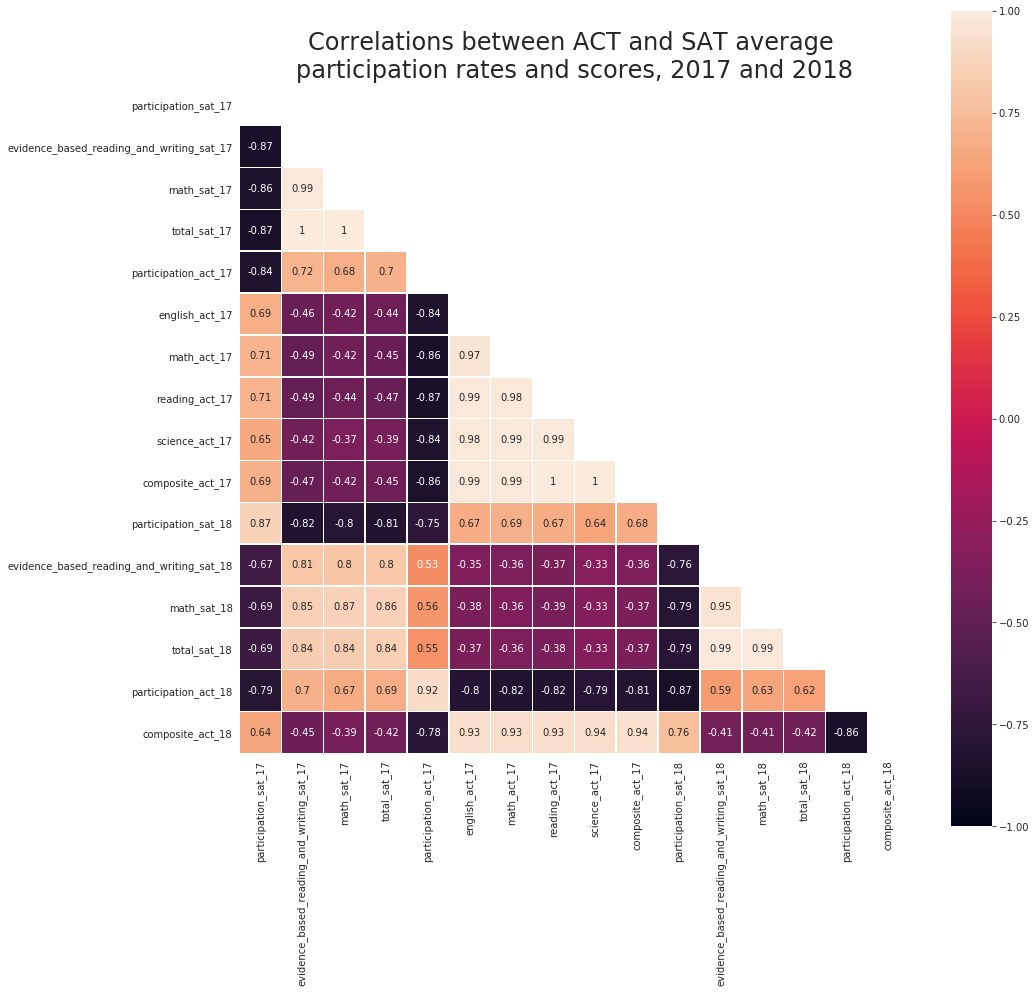

In [34]:
# https://git.generalassemb.ly/DSI-US-12/2.02b-lesson-principles-of-data-visualization-part2/blob/master/solution-code/solution-code.ipynb

plt.figure(figsize=(15, 15))

corr = final.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    sns.heatmap(corr, mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5)
    
plt.title('Correlations between ACT and SAT average \nparticipation rates and scores, 2017 and 2018', fontsize = 24);


>The heatmap shows that participation rates and scores are highly anti-correlated for both tests. It also shows strong correlations between tests across years and between multiple sections of the same test

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [35]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(16,len(list_of_columns)*4)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_ylabel('Number of States')
    plt.tight_layout()
    return

#automatically generate and reformat subplot title names
#automatically generate and reformat subplot xlabels
def titles_and_xlabels_hist(df_columns):
    
    column_names = df_columns
    new_titles = []
    for name in column_names:
        name = name.replace('_', ' ')
        name = name.replace('17', '2017')
        name = name.replace('18', '2018')
        new_titles.append(name.upper())

    new_xlabels = []
    for name in column_names:
        if 'participation' in name:
            new_xlabels.append('Participation Percentage')
        else:
            new_xlabels.append('Score')
            
    return new_titles, new_xlabels


#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

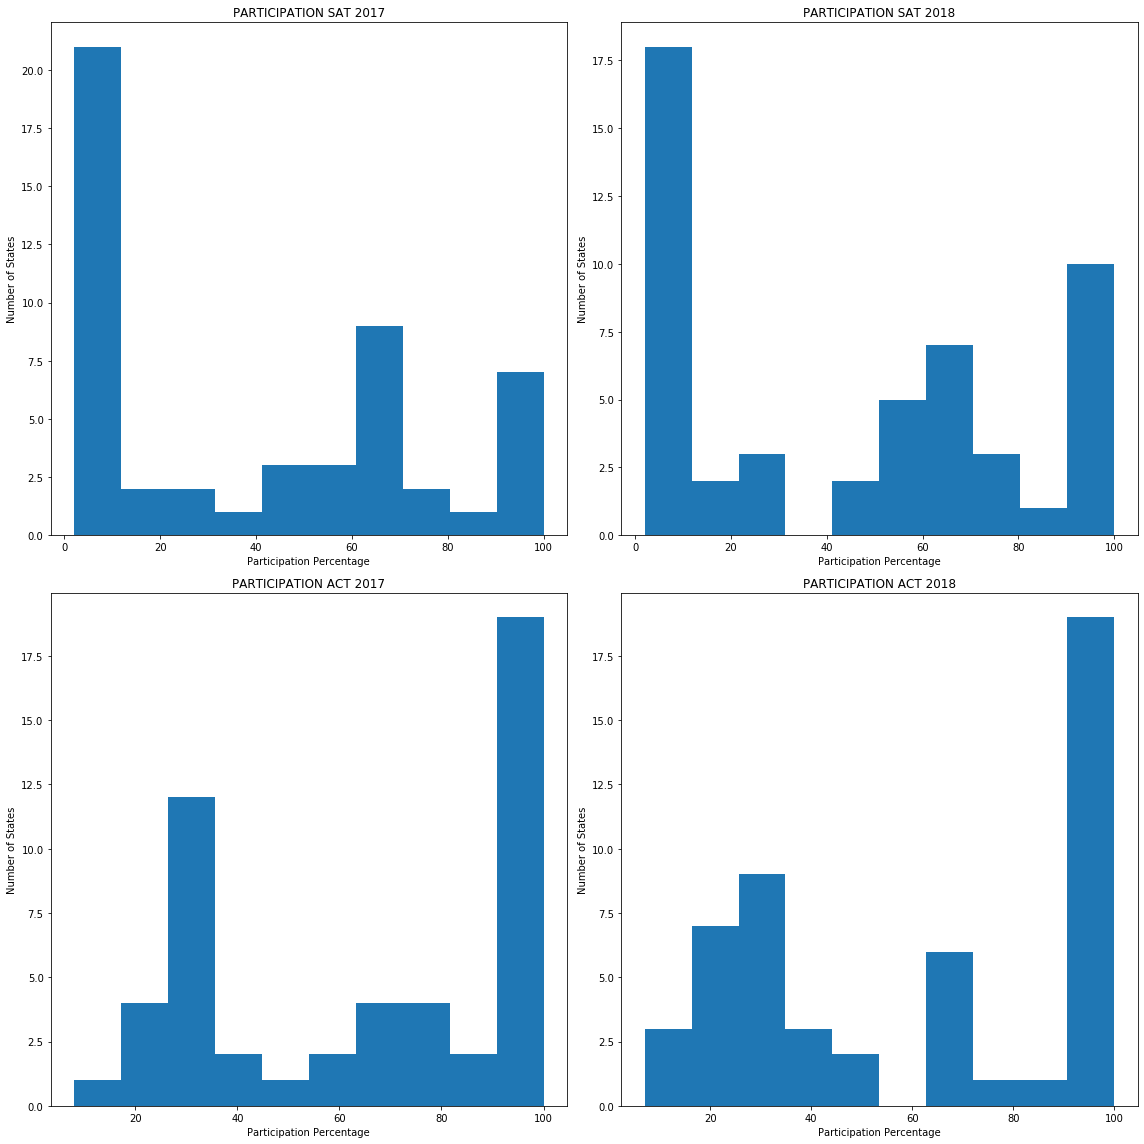

In [36]:
columns = ['participation_sat_17', 'participation_sat_18', 'participation_act_17', 'participation_act_18',]
titles, xlabels = titles_and_xlabels_hist(columns)

subplot_histograms(final, columns, titles, xlabels)

> The histograms show distributions that are roughly bimodal for all tests, years

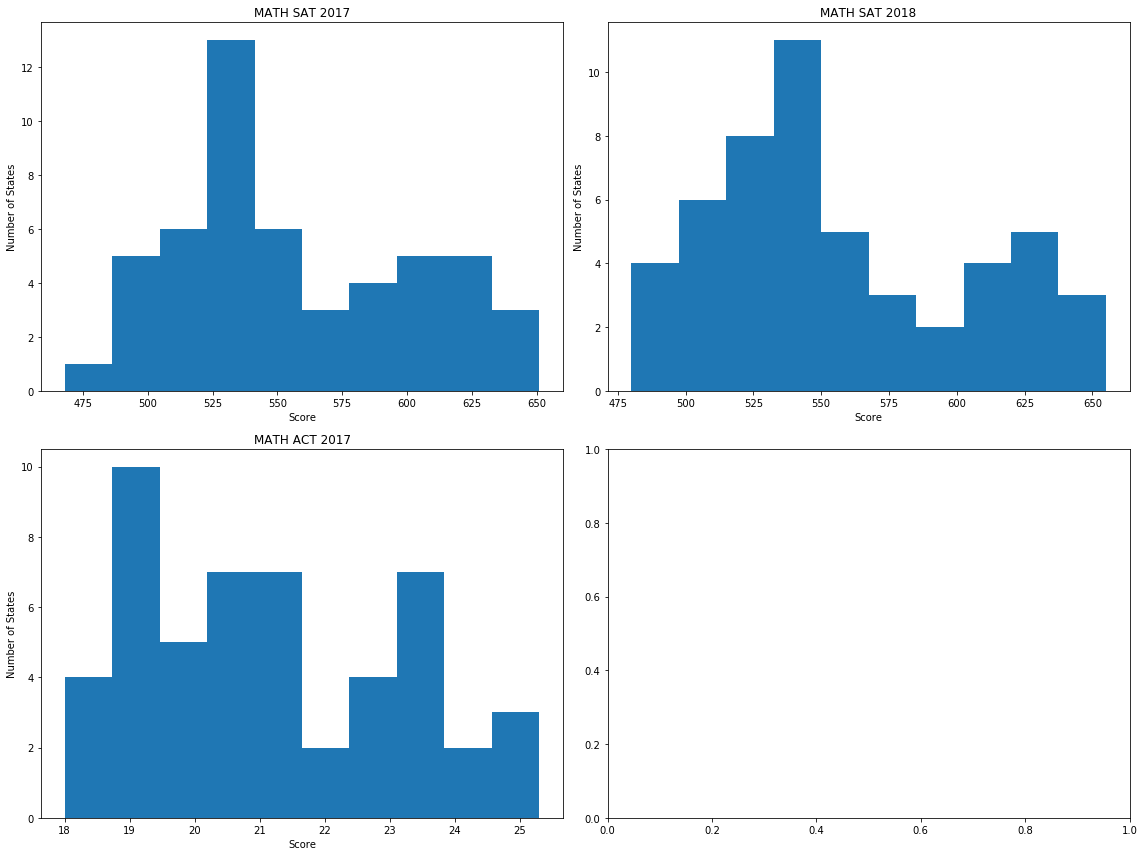

In [37]:
columns = ['math_sat_17', 'math_sat_18', 'math_act_17']
titles, xlabels = titles_and_xlabels_hist(columns)

subplot_histograms(final, columns, titles, xlabels)

>The histograms show distributions that are roughly bimodal for all tests, years

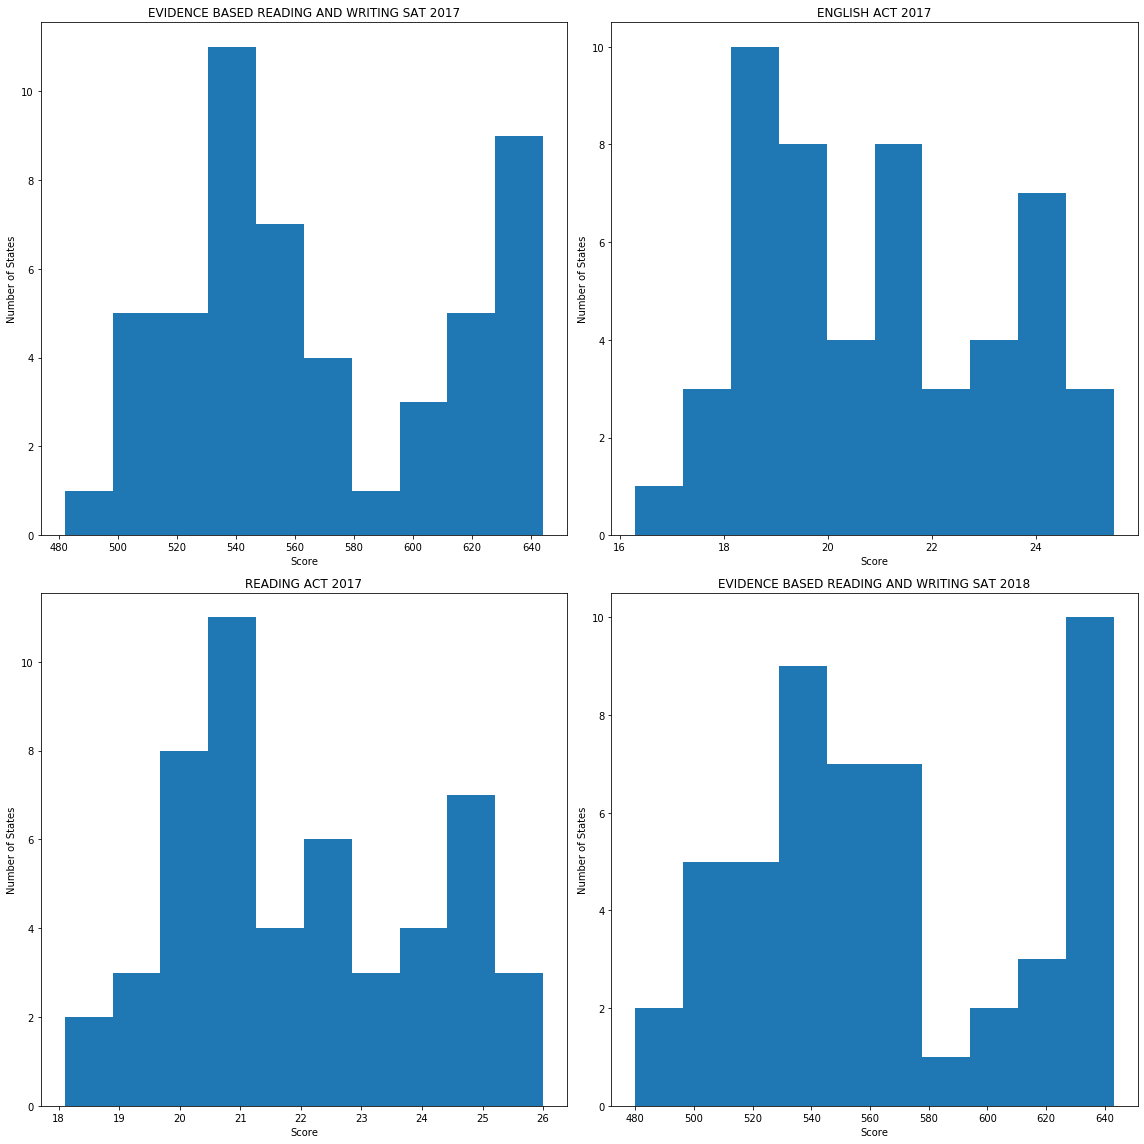

In [38]:
columns = ['evidence_based_reading_and_writing_sat_17', 'english_act_17', 'reading_act_17', 'evidence_based_reading_and_writing_sat_18']
titles, xlabels = titles_and_xlabels_hist(columns)

subplot_histograms(final, columns, titles, xlabels)

>The histograms show distributions that are roughly bimodal for all tests, years

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


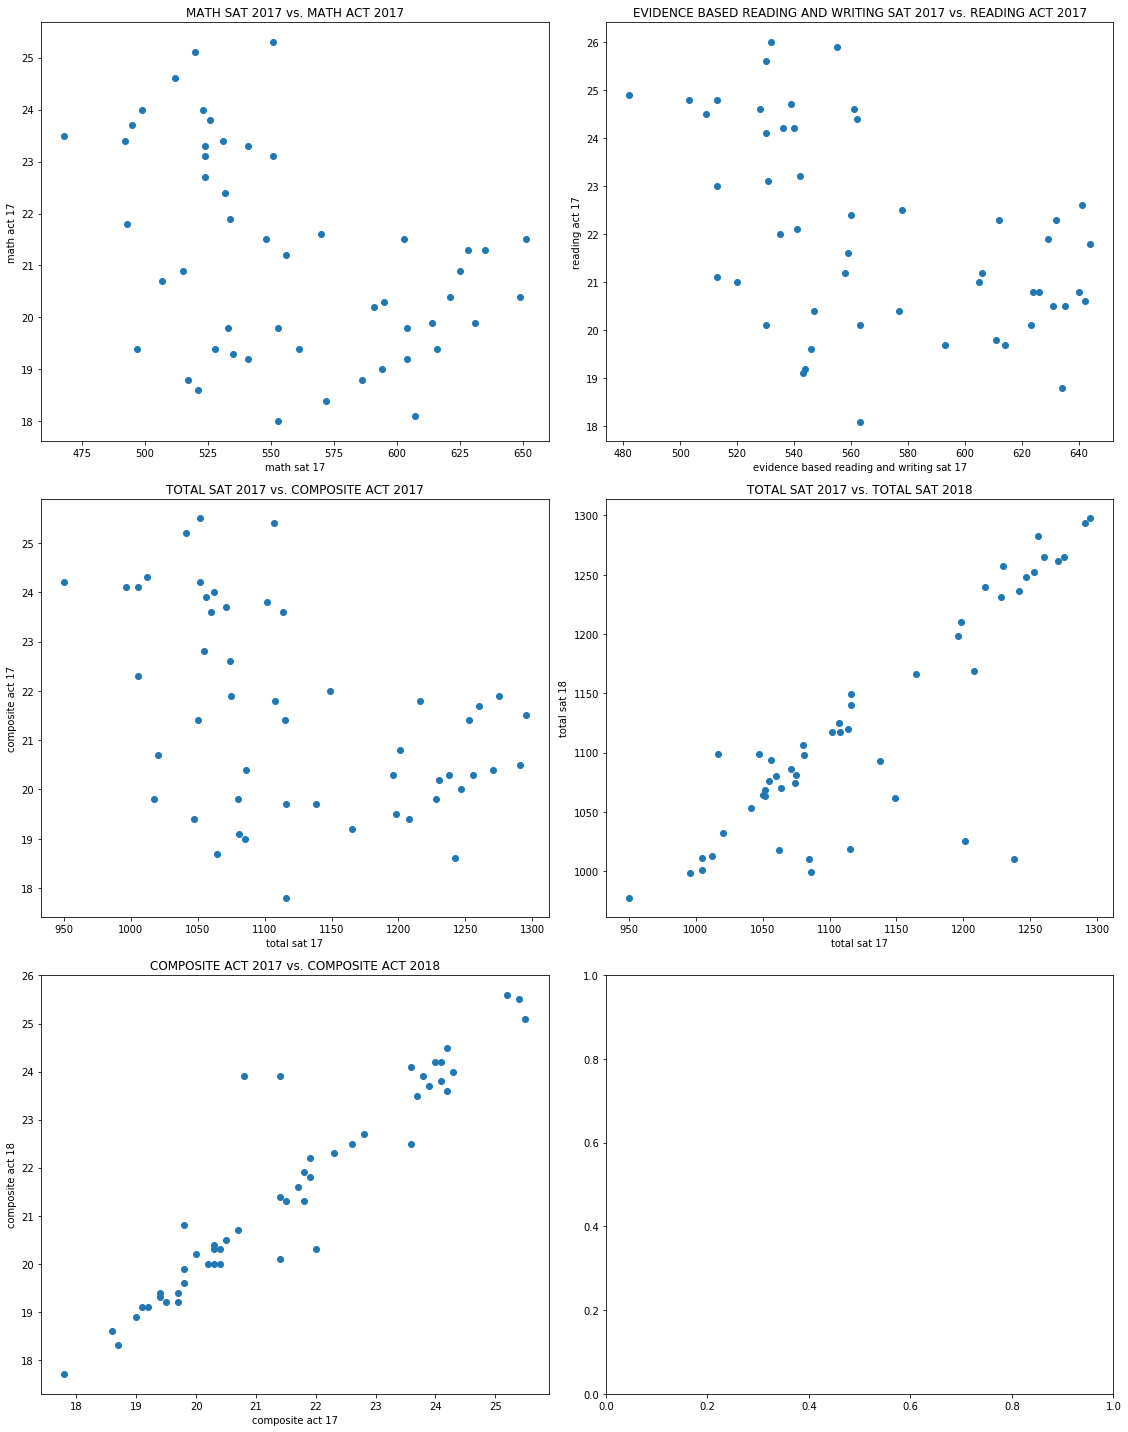

In [39]:
# Similar to subplot histogram function except you pass in a list of lists containing comparison variables
# and set axis label in function

def subplot_scatterplots(dataframe, list_of_lists, list_of_titles):
    nrows = int(np.ceil(len(list_of_lists)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(16, len(list_of_lists)*4)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_lists): # Gives us an index value to get into all our lists
        ax[i].scatter(dataframe[list_of_lists[i][0]], dataframe[list_of_lists[i][1]]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_lists[i][0].replace('_', ' '))
        ax[i].set_ylabel(list_of_lists[i][1].replace('_', ' '))
    plt.tight_layout()
    return

variables_2b_compared = [
    ['math_sat_17', 'math_act_17'],
    ['evidence_based_reading_and_writing_sat_17', 'reading_act_17'],
    ['total_sat_17', 'composite_act_17'],
    ['total_sat_17', 'total_sat_18'],
    ['composite_act_17', 'composite_act_18']
]

def titles_scatter(column_lol):
    
    new_titles = []
    for list_element1, list_element2 in column_lol:
        list_element1 = list_element1.replace('_', ' ')
        list_element1 = list_element1.replace('17', '2017')
        list_element1 = list_element1.replace('18', '2018')
        list_element2 = list_element2.replace('_', ' ')
        list_element2 = list_element2.replace('17', '2017')
        list_element2 = list_element2.replace('18', '2018')
        temp_title = list_element1.upper() + ' vs. ' + list_element2.upper()
        new_titles.append(temp_title)

    return new_titles

titles = titles_scatter(variables_2b_compared)
subplot_scatterplots(final, variables_2b_compared, titles)


> Similar sections across different tests are roughly anti-correlated. The same test across years is tightly correlated

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [40]:

# https://stackoverflow.com/questions/952914/how-to-make-a-flat-list-out-of-list-of-lists
# create a list out of two series,  **perhaps there is a more efficient method here**
def two_series_to_list(series1, series2):
    temp = [series1.tolist(), series2.tolist()]
    series_list = []
    for sublist in temp:
        for item in sublist:
            series_list.append(item)
    return series_list

# all vars that exist in '17 and '18 combined
sat_participation = two_series_to_list(final['participation_sat_17'], final['participation_sat_18'])
act_participation = two_series_to_list(final['participation_act_17'], final['participation_act_18'])
sat_reading_writing = two_series_to_list(final['evidence_based_reading_and_writing_sat_17'], final['evidence_based_reading_and_writing_sat_18'])
sat_math = two_series_to_list(final['math_sat_17'], final['math_sat_18'])
sat_total = two_series_to_list(final['total_sat_17'], final['total_sat_18'])
act_composite = two_series_to_list(final['composite_act_17'], final['composite_act_18'])


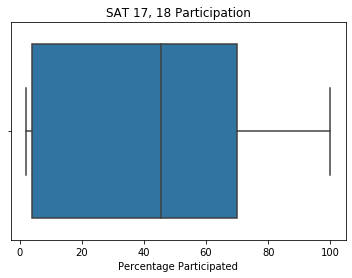

In [41]:
ax = sns.boxplot(sat_participation);
ax.set_title('SAT 17, 18 Participation');
ax.set_xlabel('Percentage Participated');

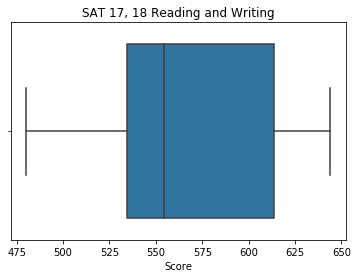

In [42]:
ax = sns.boxplot(sat_reading_writing);
ax.set_title('SAT 17, 18 Reading and Writing');
ax.set_xlabel('Score');

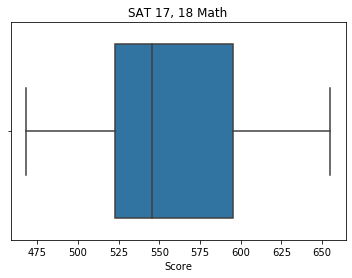

In [43]:
ax = sns.boxplot(sat_math);
ax.set_title('SAT 17, 18 Math');
ax.set_xlabel('Score');

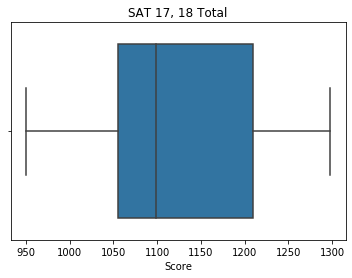

In [44]:
ax = sns.boxplot(sat_total);
ax.set_title('SAT 17, 18 Total');
ax.set_xlabel('Score');

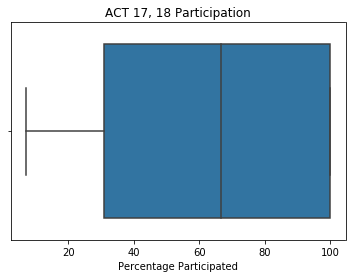

In [45]:
ax = sns.boxplot(act_participation);
ax.set_title('ACT 17, 18 Participation');
ax.set_xlabel('Percentage Participated');

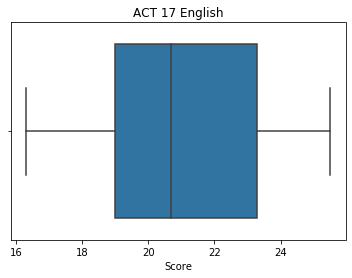

In [46]:
ax = sns.boxplot(final['english_act_17']);
ax.set_title('ACT 17 English');
ax.set_xlabel('Score');

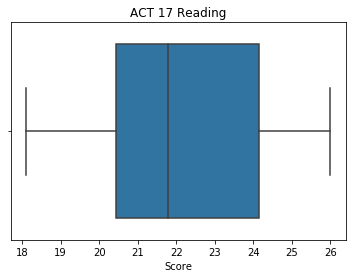

In [47]:
ax = sns.boxplot(final['reading_act_17']);
ax.set_title('ACT 17 Reading');
ax.set_xlabel('Score');

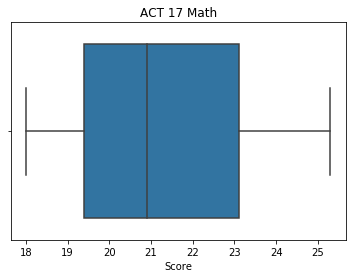

In [48]:
ax = sns.boxplot(final['math_act_17']);
ax.set_title('ACT 17 Math');
ax.set_xlabel('Score');

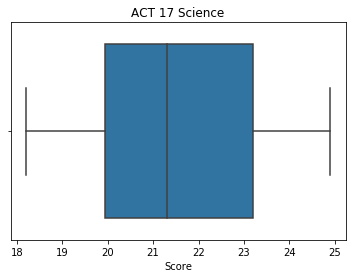

In [49]:
ax = sns.boxplot(final['science_act_17']);
ax.set_title('ACT 17 Science');
ax.set_xlabel('Score');

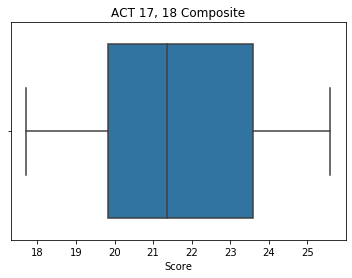

In [50]:
ax = sns.boxplot(act_composite);
ax.set_title('ACT 17, 18 Composite');
ax.set_xlabel('Score');

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

# 2019-Data-Import-and-Cleaning

In [51]:
# load in 2019 ACT dataset
act_19_df = pd.read_csv('../data/act_2019.csv')

In [52]:
row_count, column_count = act_19_df.shape

print('ACT 2019')
print(f'\n{row_count} rows by {column_count} columns\n')

act_19_df_info = act_19_df.info()

print(f'{act_19_df_info}\n')
print(act_19_df.describe())

ACT 2019

52 rows by 3 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB
None

       Composite
count  52.000000
mean   21.450000
std     2.175487
min    17.900000
25%    19.800000
50%    20.950000
75%    23.650000
max    25.500000


In [53]:
# drop National aggregate
act_19_df = act_19_df.drop([51])

In [54]:
# replace column names
act_19_new_column_list = [
    'state',
    'participation_act_19',
    'composite_act_19'
]

act_19_df.columns = act_19_new_column_list

# Dataset-Aggregation

In [55]:
# combine series from different dataframes to create new dataframe with target values
act_comp = pd.DataFrame()

act_comp['state'] = final['state']
act_comp['composite_act_17'] = final['composite_act_17']
act_comp['participation_act_17'] = final['participation_act_17']
act_comp['composite_act_18'] = final['composite_act_18']
act_comp['participation_act_18'] = final['participation_act_18']
act_comp['composite_act_19'] = act_19_df['composite_act_19']
act_comp['participation_act_19'] = act_19_df['participation_act_19']

In [56]:
# convert participation column
act_comp['participation_act_19'] = act_comp['participation_act_19'].apply(string_to_float)

In [57]:
# create grand average composite score and participation columns
act_comp['composite_mean'] = act_comp.loc[:, ['composite_act_17', 'composite_act_18', 'composite_act_19']].mean(axis=1)
act_comp['participation_mean'] = act_comp.loc[:, ['participation_act_17', 'participation_act_18', 'participation_act_19']].mean(axis=1)


In [58]:
# save out act_comp df
# act_comp.to_csv('../data/ACT_all_combined.csv')

# Underperforming-States-Trending-Positively

In [59]:
# separte required and not required participation states by year
required_17 = act_comp[act_comp['participation_act_17']>95]['composite_act_17']
required_18 = act_comp[act_comp['participation_act_18']>95]['composite_act_18']
required_19 = act_comp[act_comp['participation_act_19']>95]['composite_act_19']
not_required_17 = act_comp[act_comp['participation_act_17']<95]['composite_act_17']
not_required_18 = act_comp[act_comp['participation_act_18']<95]['composite_act_18']
not_required_19 = act_comp[act_comp['participation_act_19']<95]['composite_act_19']

In [60]:
# combine required years into list for histogram
temp1 = two_series_to_list(required_17, required_18)
required_composite_scores = two_series_to_list(pd.Series(temp1), required_19)

# combine not required years into list for histogram
temp2 = two_series_to_list(not_required_17, not_required_18)
not_required_composite_scores = two_series_to_list(pd.Series(temp2), not_required_19)

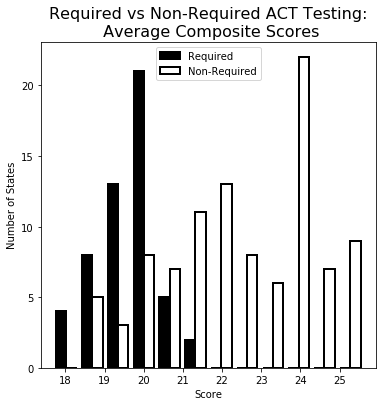

In [61]:
# plot and format required vs. not required composite score histogram
plt.figure(figsize=(6,6))
plt.hist([required_composite_scores, not_required_composite_scores], color=['k', 'w'], edgecolor='black', linewidth=2, bins=12);
plt.title('Required vs Non-Required ACT Testing:\n Average Composite Scores', fontsize=16)
plt.xlabel('Score')
plt.ylabel('Number of States');
plt.legend(['Required', 'Non-Required']);

In [62]:
# create new dataframes of required and not required states
not_required_mask = (act_comp['participation_act_17'] < 95) & (act_comp['participation_act_18'] < 95) & (act_comp['participation_act_17'] < 95)

not100_act_comp = act_comp[not_required_mask]
is100_act_comp = act_comp[~not_required_mask]

not100_act_comp.reset_index(drop=True, inplace=True)
is100_act_comp.reset_index(drop=True, inplace=True)

In [63]:
# create grand average columns for each dataframe
# **throws warning**
not100_act_comp['composite_mean'] = not100_act_comp.loc[:, ['composite_act_17', 'composite_act_18', 'composite_act_19']].mean(axis=1)
not100_act_comp['participation_mean'] = not100_act_comp.loc[:, ['participation_act_17', 'participation_act_18', 'participation_act_19']].mean(axis=1)


/Users/henryvalk/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/henryvalk/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [64]:
# perform median split on not required df and create two new dataframes
act_comp_lower = not100_act_comp[not100_act_comp['composite_mean'] <= not100_act_comp.describe().loc['50%', 'composite_mean']]
act_comp_higher = not100_act_comp[not100_act_comp['composite_mean'] > not100_act_comp.describe().loc['50%', 'composite_mean']]

In [65]:
# identify states in act_comp_lower that have improved composite scores three years consecutively
pos_trend_mask = (act_comp_lower['composite_act_18'] > act_comp_lower['composite_act_17']) & (act_comp_lower['composite_act_19'] > act_comp_lower['composite_act_18'])
act_comp_lower[pos_trend_mask]

,state,composite_act_17,participation_act_17,composite_act_18,participation_act_18,composite_act_19,participation_act_19,composite_mean,participation_mean
6,Florida,19.8,73.0,19.9,66.0,20.1,54.0,19.933333,64.333333


#### Florida! Florida is the only state in the underperforming half of states that don't require students take the ACT, that has increased composite ACT scores for the past 3 consecutive years.
<br />
<br />

In [66]:
# find states from full df that improved composite scores three years consecutively
act_comp[(act_comp['composite_act_18'] > act_comp['composite_act_17']) & (act_comp['composite_act_19'] > act_comp['composite_act_18'])]

,state,composite_act_17,participation_act_17,composite_act_18,participation_act_18,composite_act_19,participation_act_19,composite_mean,participation_mean
9,Florida,19.8,73.0,19.9,66.0,20.1,54.0,19.933333,64.333333
13,Illinois,21.4,93.0,23.9,43.0,24.3,35.0,23.200000,57.000000
22,Michigan,24.1,29.0,24.2,22.0,24.4,19.0,24.233333,23.333333
39,Rhode Island,24.0,21.0,24.2,15.0,24.7,12.0,24.300000,16.000000
46,Virginia,23.8,29.0,23.9,24.0,24.0,21.0,23.900000,24.666667


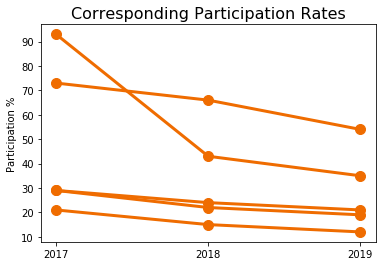

In [67]:
# plot and format participation rate changes for states above
plot_points1 = [act_comp.loc[9, 'participation_act_17'], act_comp.loc[9, 'participation_act_18'], act_comp.loc[9, 'participation_act_19']]
plot_points2 = [act_comp.loc[13, 'participation_act_17'], act_comp.loc[13, 'participation_act_18'], act_comp.loc[13, 'participation_act_19']]
plot_points3 = [act_comp.loc[22, 'participation_act_17'], act_comp.loc[22, 'participation_act_18'], act_comp.loc[22, 'participation_act_19']]
plot_points4 = [act_comp.loc[39, 'participation_act_17'], act_comp.loc[39, 'participation_act_18'], act_comp.loc[39, 'participation_act_19']]
plot_points5 = [act_comp.loc[46, 'participation_act_17'], act_comp.loc[46, 'participation_act_18'], act_comp.loc[46, 'participation_act_19']]

plt.plot(plot_points1, 'k.-', MarkerSize = 20, color='#ef6c00', linewidth=3)
plt.plot(plot_points2, 'k.-', MarkerSize = 20, color='#ef6c00', linewidth=3)
plt.plot(plot_points3, 'k.-', MarkerSize = 20, color='#ef6c00', linewidth=3)
plt.plot(plot_points4, 'k.-', MarkerSize = 20, color='#ef6c00', linewidth=3)
plt.plot(plot_points5, 'k.-', MarkerSize = 20, color='#ef6c00', linewidth=3)

plt.title('Corresponding Participation Rates', fontsize=16)
plt.ylabel('Participation %')
plt.xticks(np.arange(3), ['2017', '2018', '2019']);
plt.show()


> Interestingly, of the 5 states who have improved ACT score 3 years consecutively, all of them show decreasing participation rates over the past 3 years

# Choropleth-Plots

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

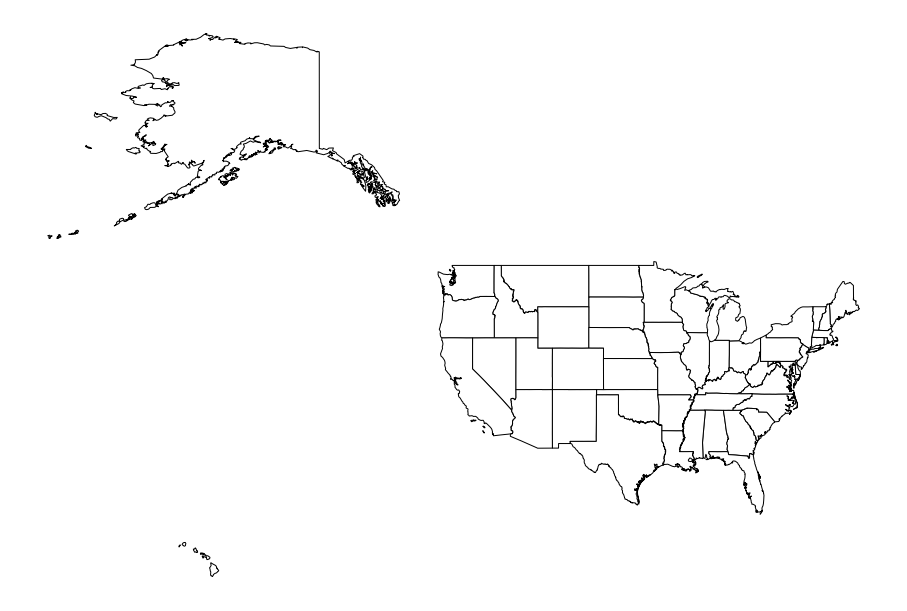

In [68]:
# not using Tableau, but using GeoPandas
# https://towardsdatascience.com/a-beginners-guide-to-create-a-cloropleth-map-in-python-using-geopandas-and-matplotlib-9cc4175ab630
# https://www.arcgis.com/home/item.html?id=f7f805eb65eb4ab787a0a3e1116ca7e5
# USA shapefile ^

# plot blank map
map_df = gpd.read_file('../data/usa_shapefiles/states.shp')

fig = map_df.plot(figsize=(16,16), edgecolors='k', facecolor='w')
fig.axis('off');


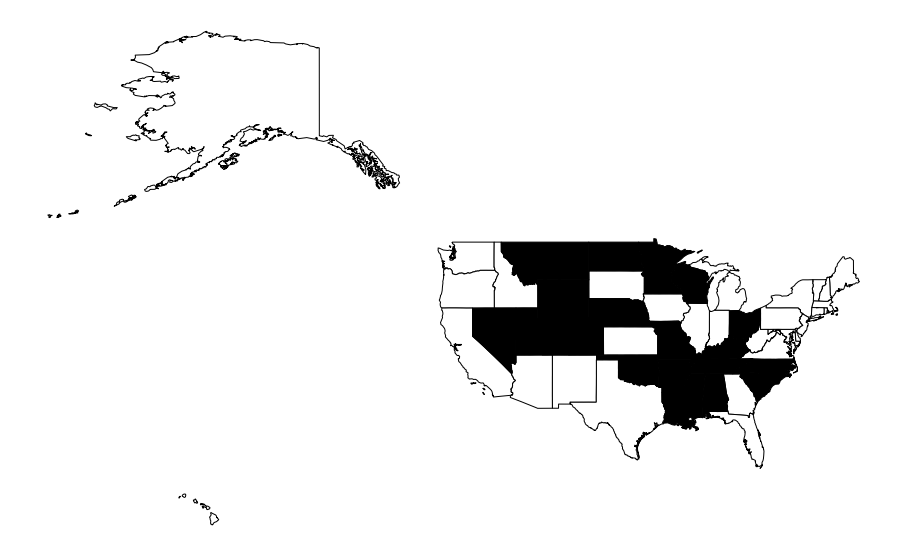

In [69]:
# overlay states that don't require act vs states that do not
base = map_df[map_df['STATE_NAME'].isin(not100_act_comp['state'])].plot(figsize=(16,16), edgecolors='k', facecolor='w')
fig = map_df[map_df['STATE_NAME'].isin(is100_act_comp['state'])].plot(ax=base, figsize=(16,16), edgecolors='k', facecolor='k')
fig.axis('off');

In [70]:
# join the geodataframe with the csv dataframe
merged = map_df.merge(act_comp, how='left', left_on="STATE_NAME", right_on="state")

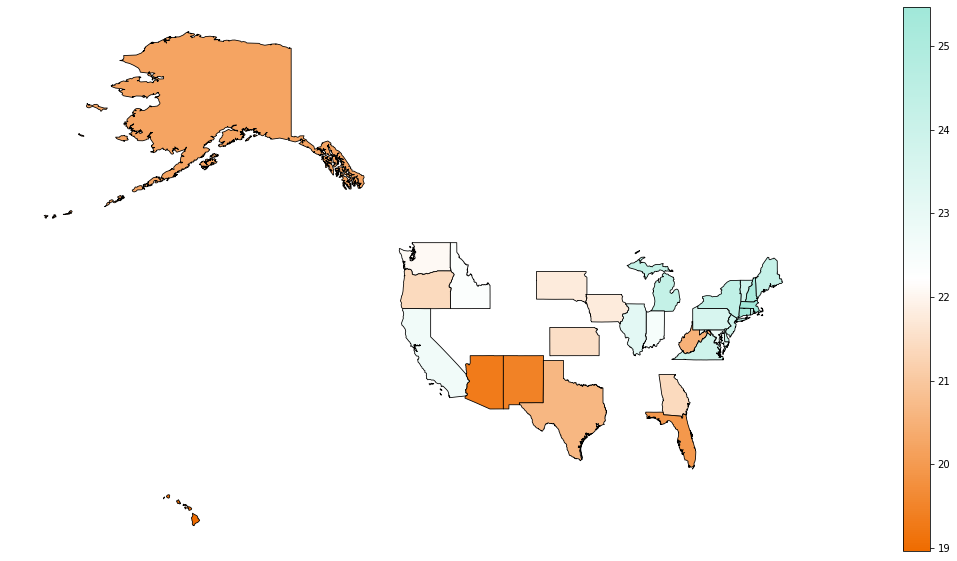

In [71]:
# https://stackoverflow.com/questions/16834861/create-own-colormap-using-matplotlib-and-plot-color-scale
# https://towardsdatascience.com/a-beginners-guide-to-create-a-cloropleth-map-in-python-using-geopandas-and-matplotlib-9cc4175ab630
# plot ACT composite score average by state, required participation states excluded

cmap = clrs.LinearSegmentedColormap.from_list('', ['#ef6c00','w','#a1e8d9'])
variable = merged[merged['STATE_NAME'].isin(not100_act_comp['state'])]['composite_mean']
# set the range for the choropleth values
vmin, vmax = merged[merged['STATE_NAME'].isin(not100_act_comp['state'])]['composite_mean'].min(), merged[merged['STATE_NAME'].isin(not100_act_comp['state'])]['composite_mean'].max()
fig, ax = plt.subplots(1, figsize=(30, 10))
ax.axis('off')

# create colorbar legend
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
fig.colorbar(sm)

merged[merged['STATE_NAME'].isin(not100_act_comp['state'])].plot(column=variable, cmap=cmap, linewidth=0.8, ax=ax, edgecolor='k');


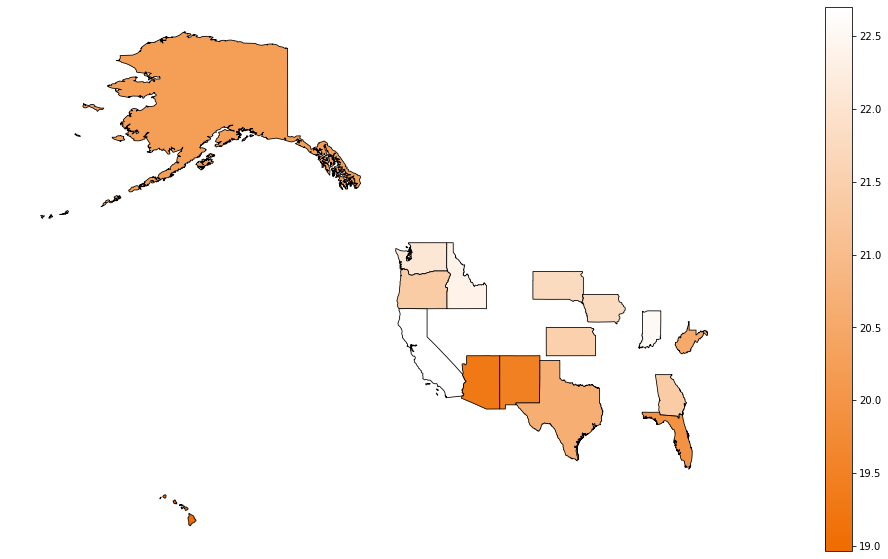

In [72]:
# repeat map for lower half of median split

cmap = clrs.LinearSegmentedColormap.from_list('', ['#ef6c00','w'])
variable = merged[merged['STATE_NAME'].isin(act_comp_lower['state'])]['composite_mean']
# set the range for the choropleth values
vmin, vmax = merged[merged['STATE_NAME'].isin(act_comp_lower['state'])]['composite_mean'].min(), merged[merged['STATE_NAME'].isin(act_comp_lower['state'])]['composite_mean'].max()
fig, ax = plt.subplots(1, figsize=(30, 10))
ax.axis('off')

# create colorbar legend
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
fig.colorbar(sm)

merged[merged['STATE_NAME'].isin(act_comp_lower['state'])].plot(column=variable, cmap=cmap, linewidth=0.8, ax=ax, edgecolor='k');


## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

#### Florida's Senate Bill 926, passed in 2017
* Pushes back test dates to later in the school year, possibly leading to improved test scores
* Allows students to opt-out of other standardized test graduation required if they get above a certain score on the ACT. This increased incentive may have also contributed to increased test scores.

[Tampa Bay Times]( (https://www.tampabay.com/news/politics/stateroundup/senators-homework-pays-off-in-progress-on-reducing-student-assessment-tests/2319023/) )


## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

* Participations rates strongly influence ACT scores
* Few states are trending positively
* Florida is the only underperforming state which does not require the ACT and has 3 consecutive years of ACT score improvement
<br />
<br />
* Consider variables other than standardized test scores
    * Are test scores the best reflection of a positive learning experience? Perhaps looks at graduation rates instead

* Determine if the relationship between participation rates and test scores is statistically significant